<a href="https://colab.research.google.com/github/annisaast/machine-learning-project-from-idcamp-2024/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Annisaa'_Sha'idatut_Taqiyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from matplotlib import cm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Membaca dataset Customer dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('https://raw.githubusercontent.com/annisaast/ProyekMachineLearning/main/shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
print('Informasi dataset : ')
df.info()

Informasi dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used    

In [5]:
df.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [6]:
print('Jumlah duplikasi : ' + str(df.duplicated().sum()))

Jumlah duplikasi : 0


In [7]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage


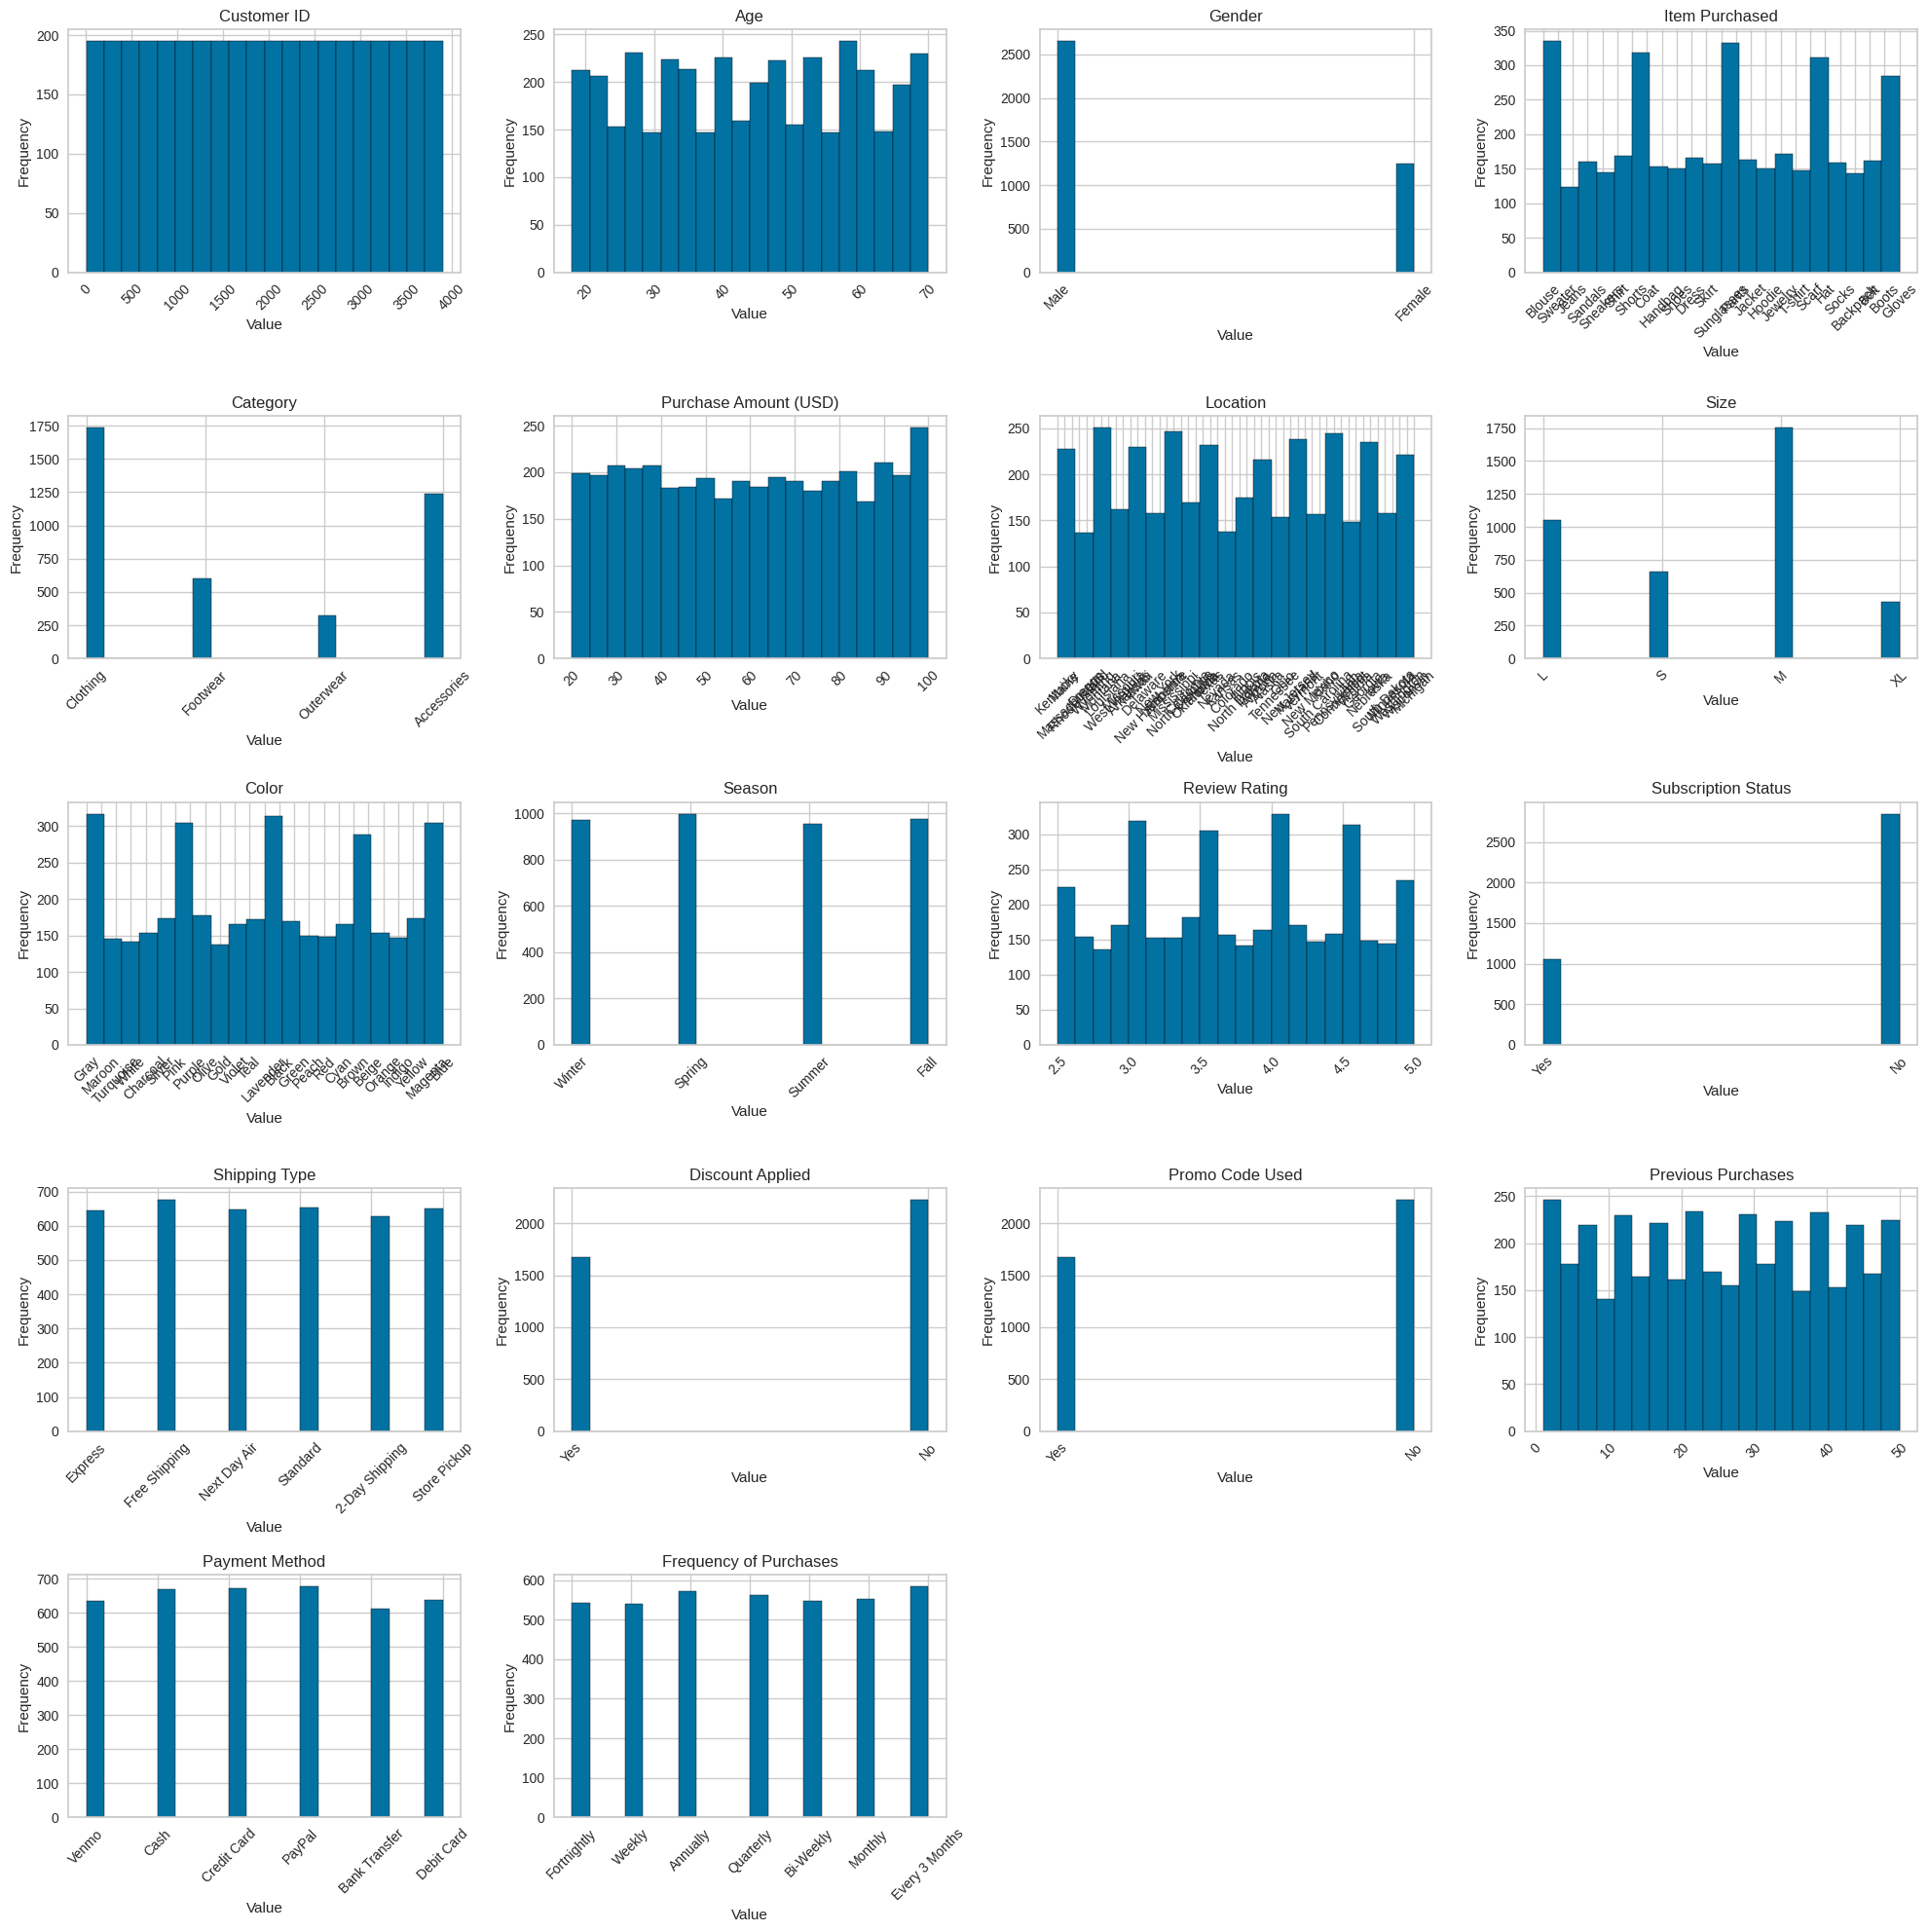

In [8]:
# Menghitung jumlah variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

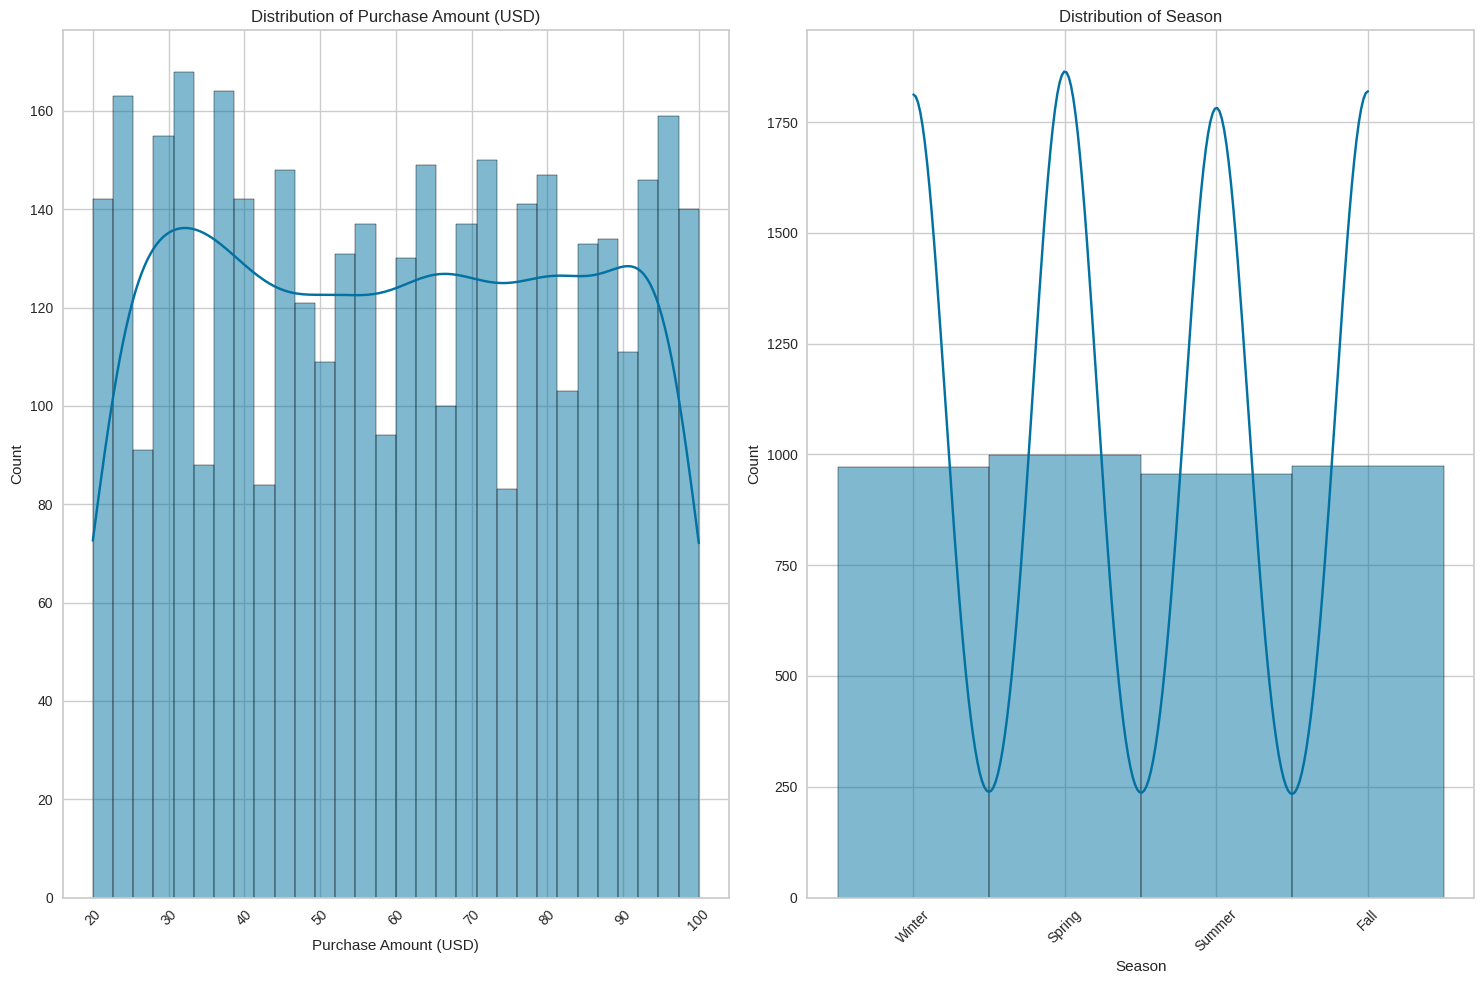

In [9]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['Purchase Amount (USD)', 'Season']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [10]:
# Menangani Missing Value

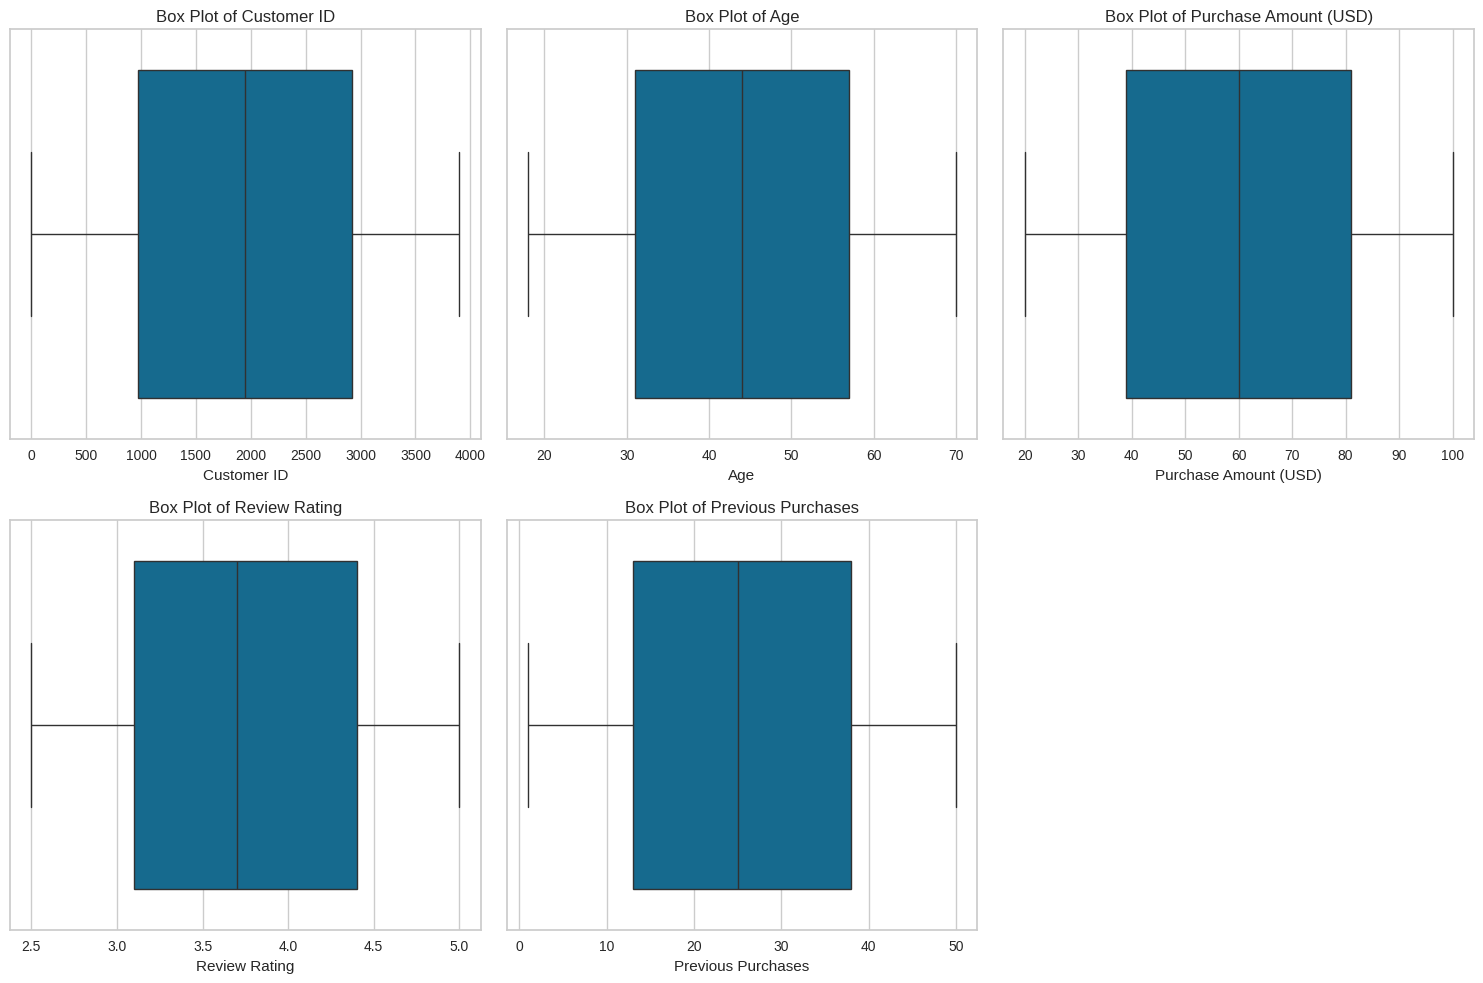

In [11]:
# Deteksi Outlier
numeric_features = df.select_dtypes(include=[np.number])

# Tentukan jumlah kolom dan baris untuk subplot
ncols = 3
nrows = (len(numeric_features.columns) // ncols) + (1 if len(numeric_features.columns) % ncols != 0 else 0)

# Inisialisasi figure
plt.figure(figsize=(5 * ncols, 5 * nrows))

# Loop untuk menampilkan boxplot untuk setiap fitur numerik
for i, feature in enumerate(numeric_features.columns, start=1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

# Tampilkan semua plot
plt.tight_layout()
plt.show()

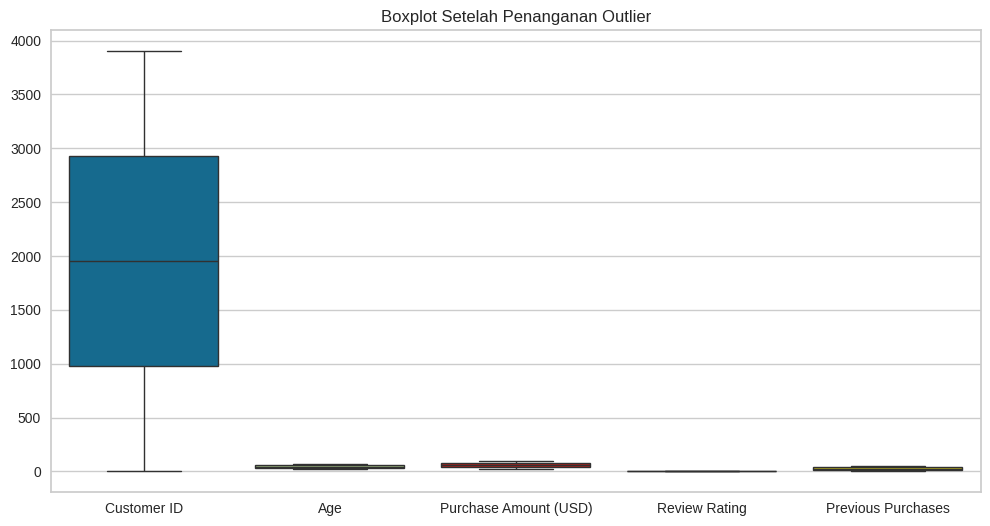

In [12]:
# Penanganan Outlier Menggunakan Batas Terdekat
numeric_features = df.select_dtypes(include=[np.number]).columns

# Menghitung Q1, Q3, dan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clipping Outlier berdasarkan batas
df[numeric_features] = df[numeric_features].apply(lambda x: x.clip(lower_bound[x.name], upper_bound[x.name]))

# Boxplot setelah penanganan
df_clipped = df.copy()
df_clipped[numeric_features] = df_clipped[numeric_features].apply(lambda x: x.clip(lower_bound[x.name], upper_bound[x.name]))

# Plot Boxplot setelah penanganan outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clipped[numeric_features])
plt.title("Boxplot Setelah Penanganan Outlier")
plt.show()

In [13]:
# Encoding Data Kategorikal
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil data teratas
df_lencoder.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


In [14]:
# EDA Setelah Data Cleaning
df_lencoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   int64  
 3   Item Purchased          3900 non-null   int64  
 4   Category                3900 non-null   int64  
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   int64  
 7   Size                    3900 non-null   int64  
 8   Color                   3900 non-null   int64  
 9   Season                  3900 non-null   int64  
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   int64  
 12  Shipping Type           3900 non-null   int64  
 13  Discount Applied        3900 non-null   int64  
 14  Promo Code Used         3900 non-null   

In [15]:
df_lencoder.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,0.680000,12.035385,1.001795,59.764359,24.266410,1.120000,12.109487,1.492821,3.749949,0.270000,2.514359,0.430000,0.430000,25.351538,2.512308,2.974872
std,1125.977353,15.207589,0.466536,7.199162,0.896688,23.685392,14.343299,0.930496,7.221592,1.117236,0.716223,0.444016,1.697591,0.495139,0.495139,14.447125,1.690643,1.998559
min,1.000000,18.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,975.750000,31.000000,0.000000,6.000000,0.000000,39.000000,12.000000,0.000000,6.000000,0.750000,3.100000,0.000000,1.000000,0.000000,0.000000,13.000000,1.000000,1.000000
50%,1950.500000,44.000000,1.000000,12.000000,1.000000,60.000000,24.000000,1.000000,12.000000,1.000000,3.700000,0.000000,3.000000,0.000000,0.000000,25.000000,2.000000,3.000000
75%,2925.250000,57.000000,1.000000,18.000000,1.000000,81.000000,36.000000,2.000000,18.000000,2.000000,4.400000,1.000000,4.000000,1.000000,1.000000,38.000000,4.000000,5.000000
max,3900.000000,70.000000,1.000000,24.000000,3.000000,100.000000,49.000000,3.000000,24.000000,3.000000,5.000000,1.000000,5.000000,1.000000,1.000000,50.000000,5.000000,6.000000


In [16]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage


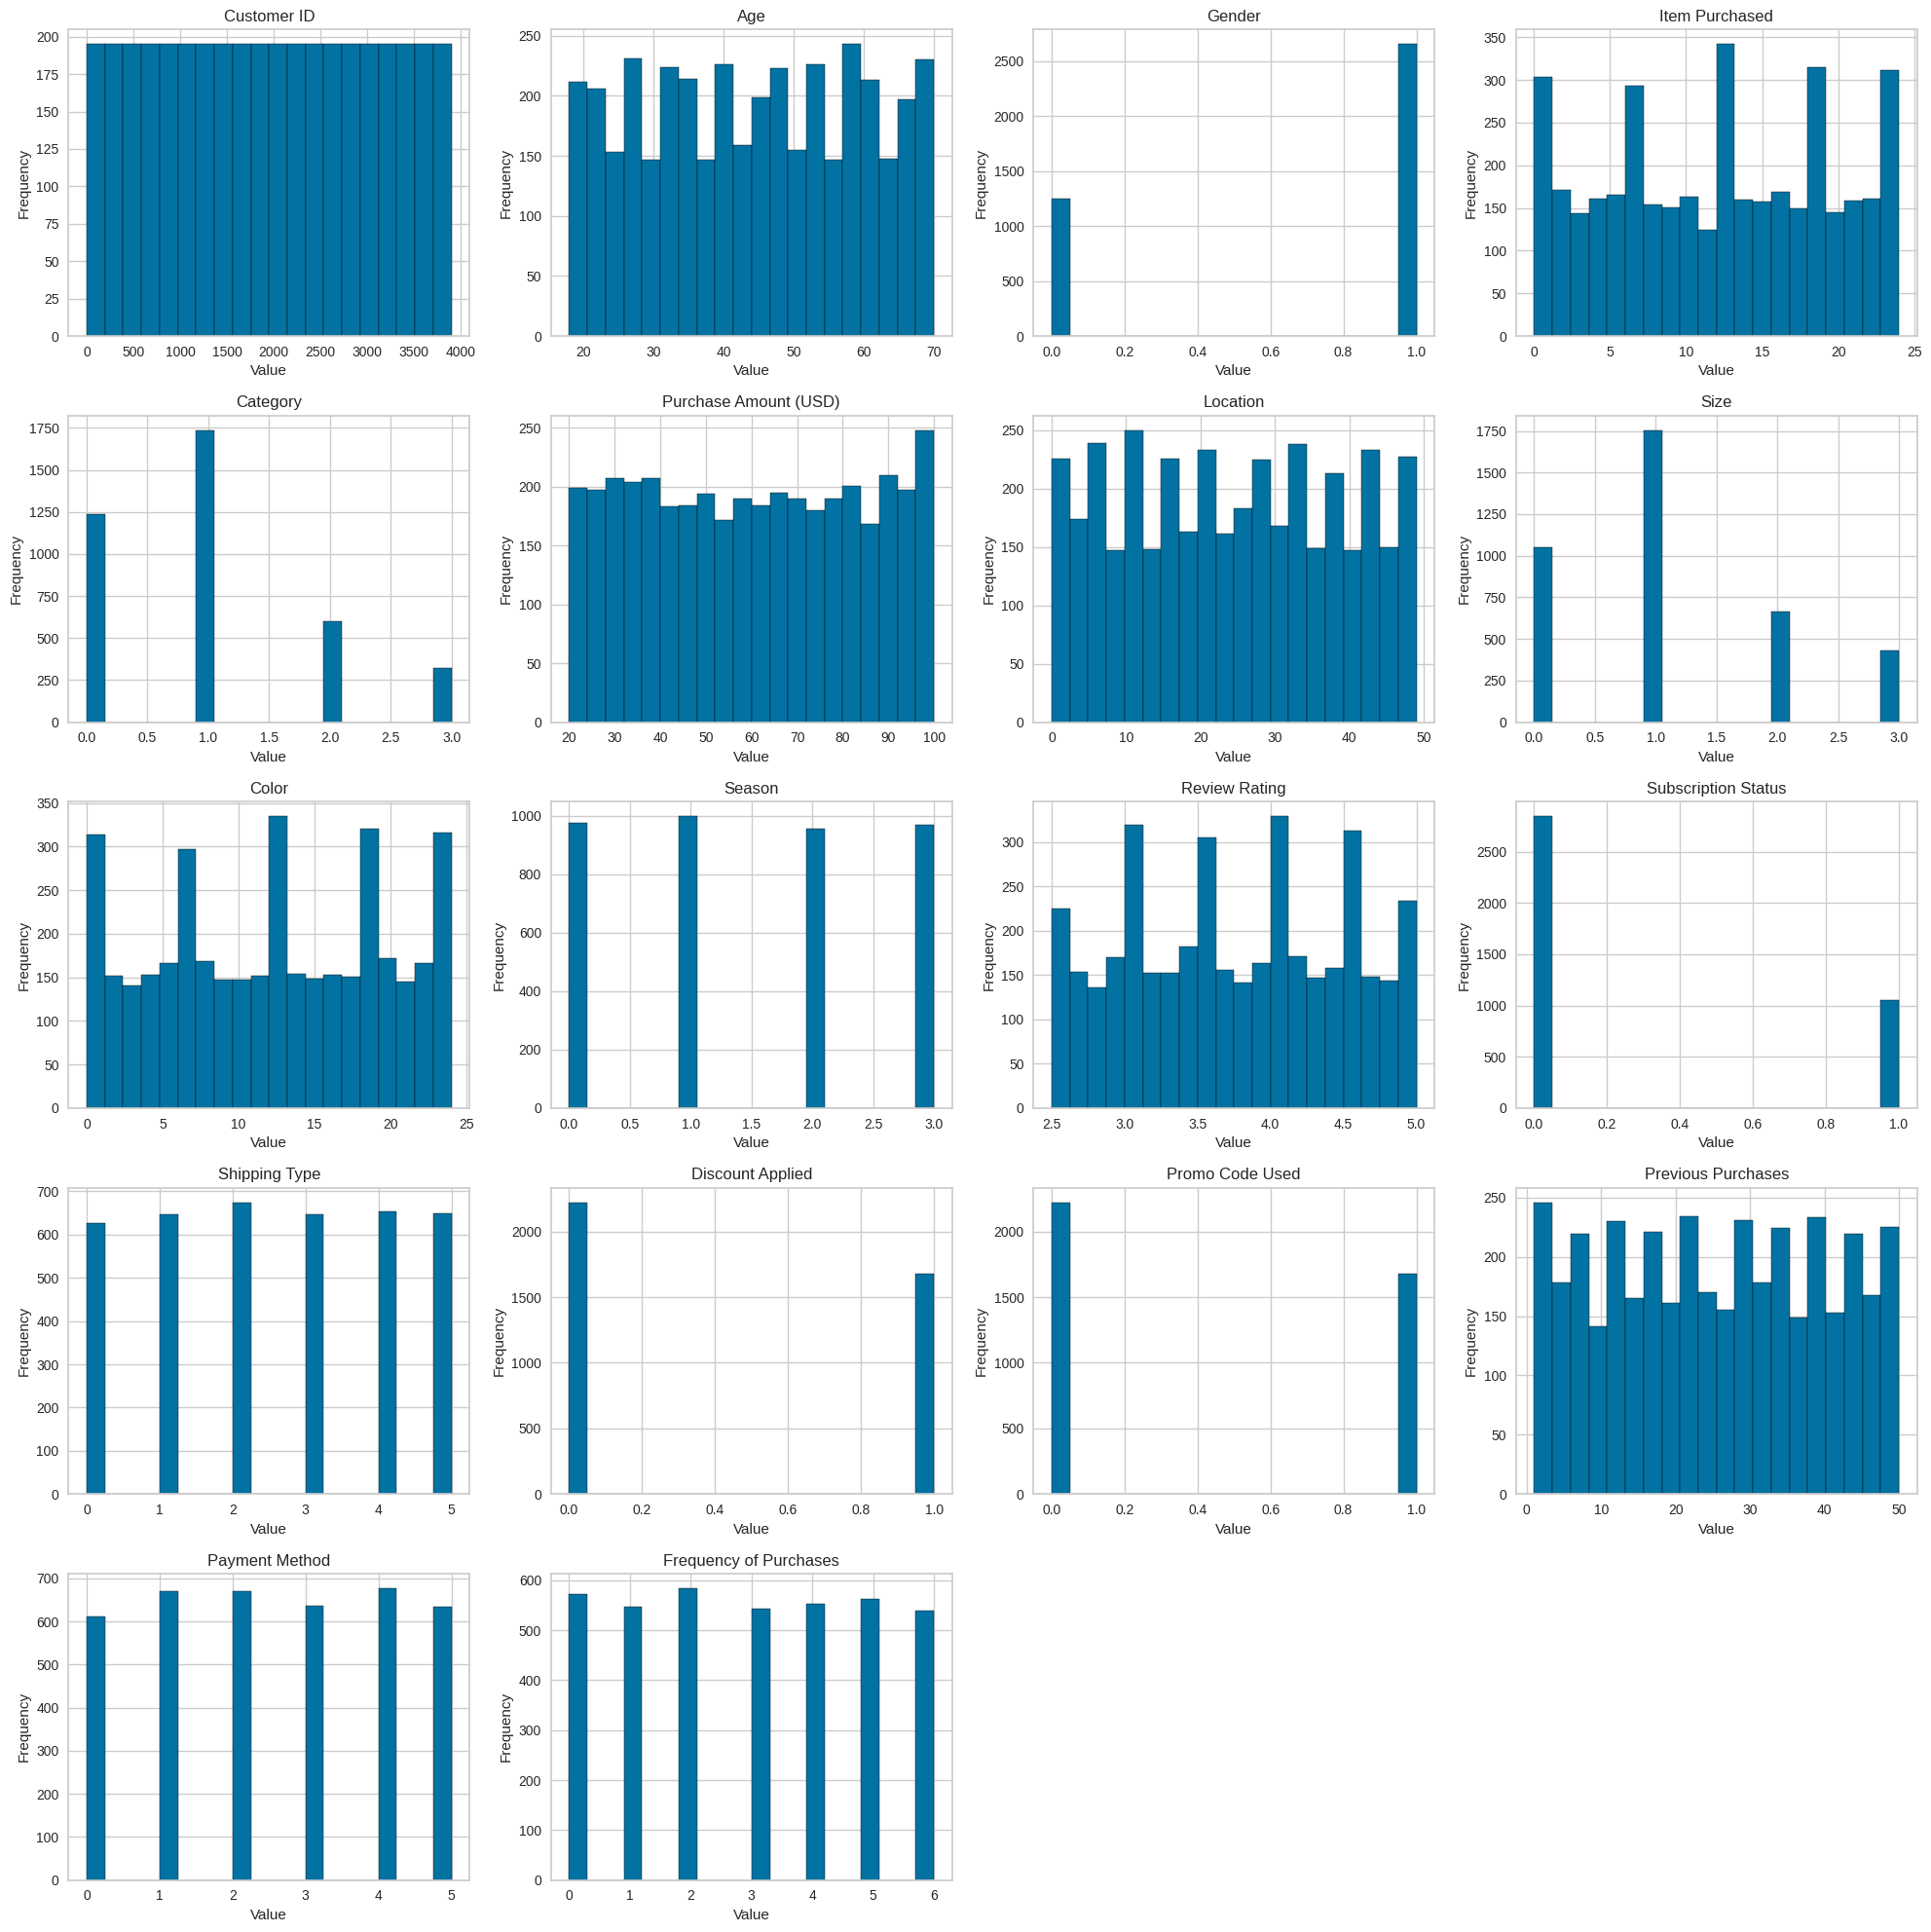

In [17]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

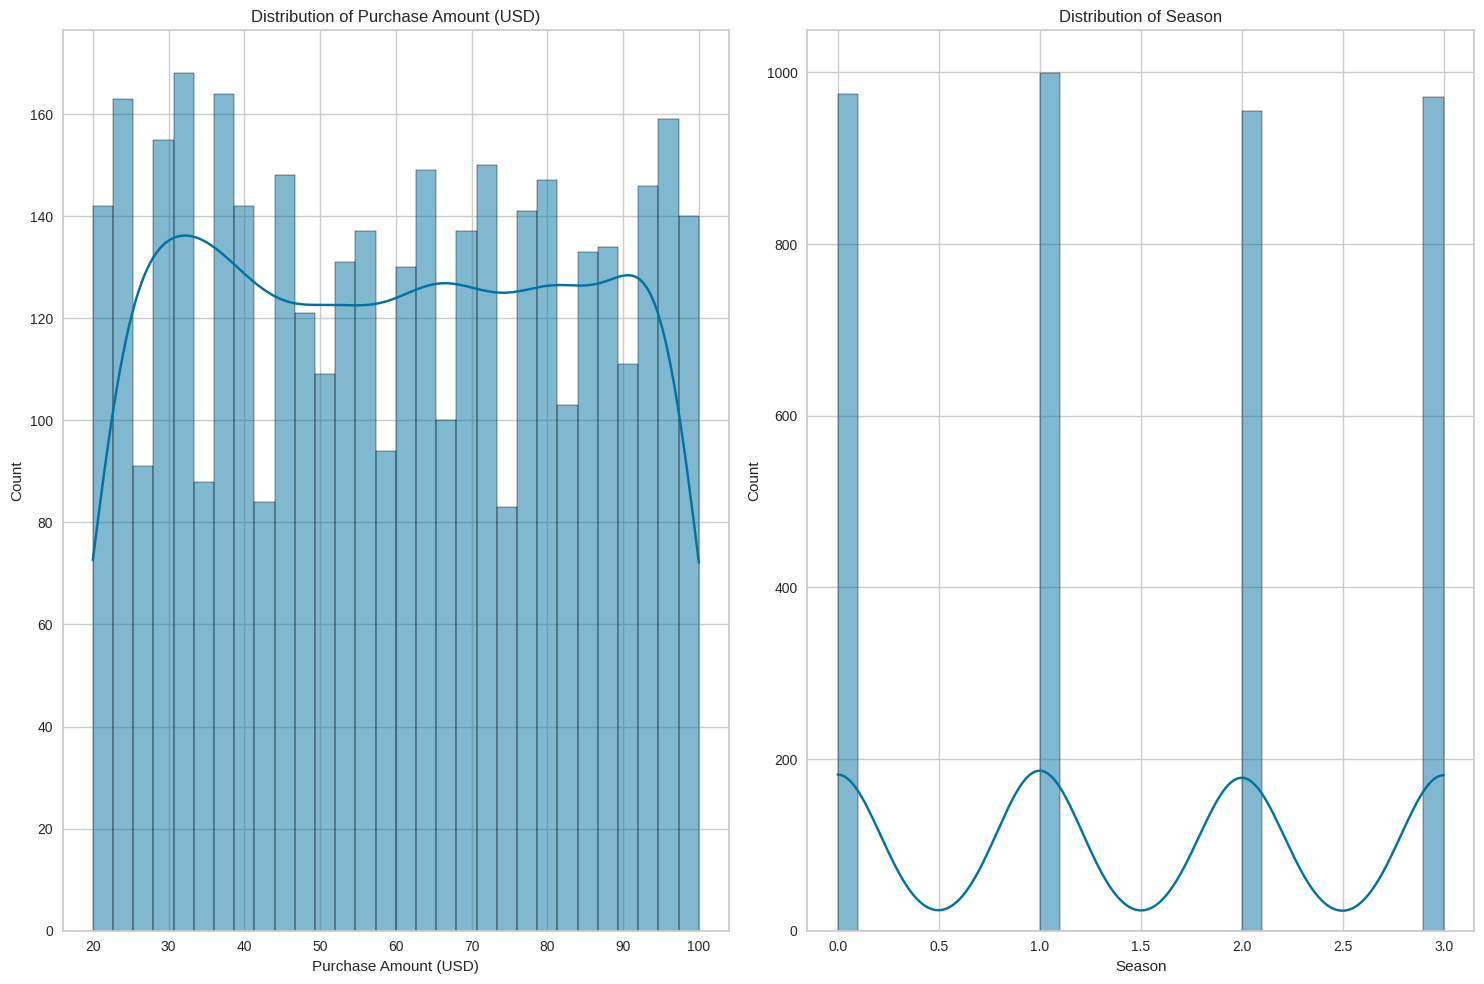

In [18]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['Purchase Amount (USD)', 'Season']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

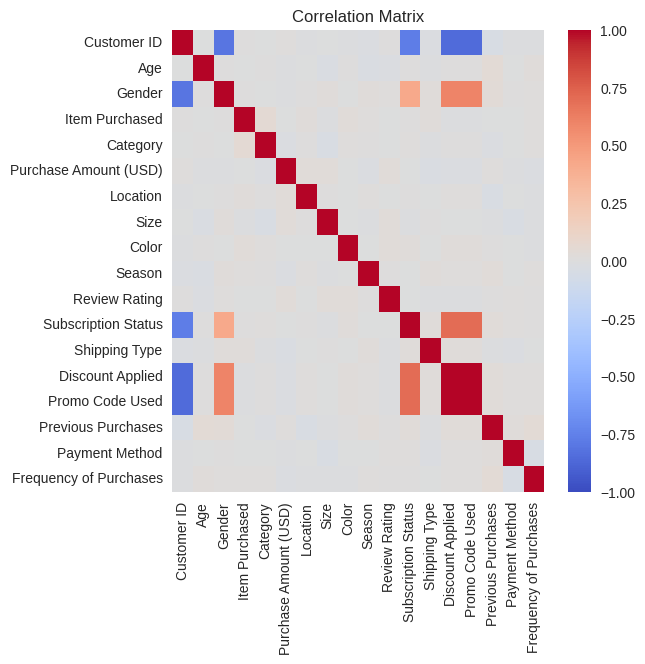

In [19]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(6, 6))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

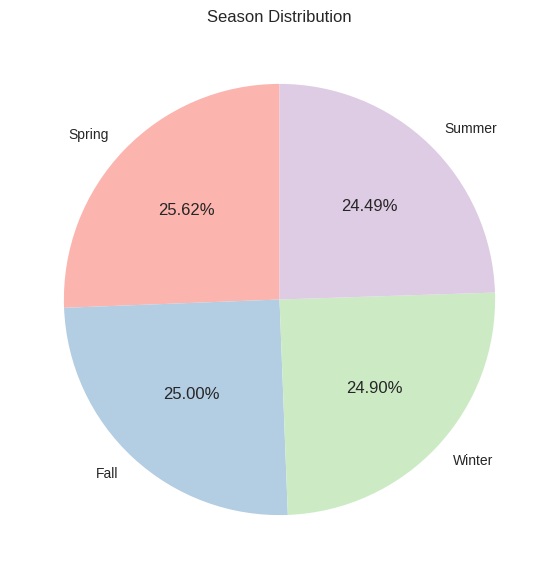

In [20]:
# Menghitung distribusi Season dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
colors = plt.cm.Pastel1(range(len(df['Season'].value_counts())))
plt.pie(df['Season'].value_counts(),
    labels = df['Season'].value_counts().index,
    autopct = '%1.2f%%',
    startangle = 90,
    colors = colors)
plt.title('Season Distribution')
plt.show()

Rentang setiap bin:
Low: (19.999, 45.667]
Medium: (45.667, 73.0]
High: (73.0, 100.0]


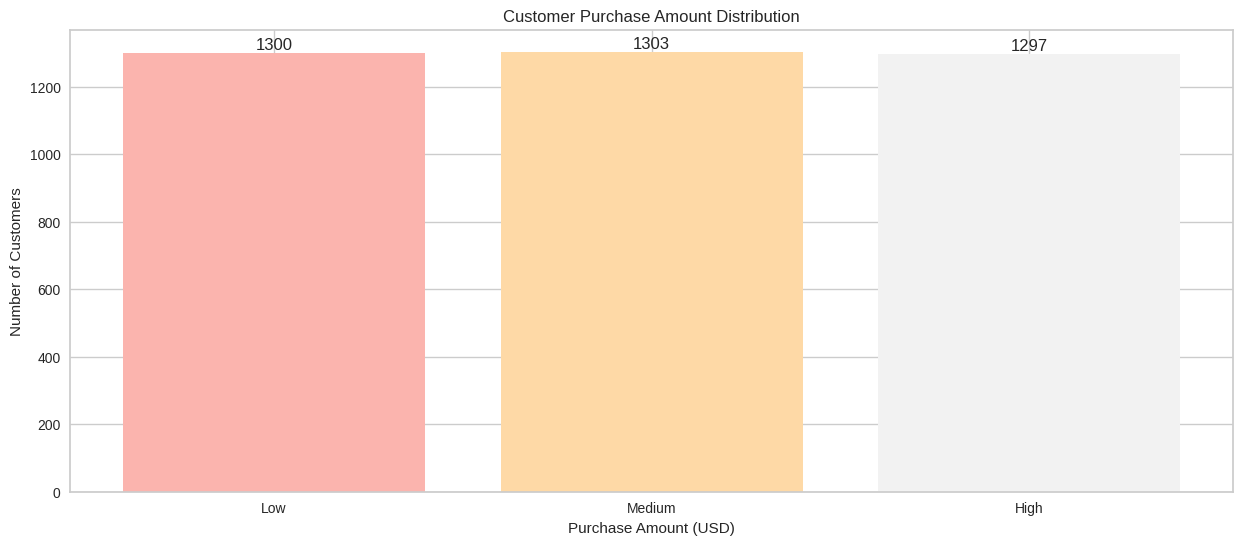

In [21]:
# Misalkan df sudah ada, melakukan deep copy
df_binned = copy.deepcopy(df)

# Mengelompokkan Purchase Amount (USD) ke dalam 4 kategori
bins_purchase = 3
labels_purchase = ["Low", "Medium", "High"]

df_binned['Purchase Amount (USD) Binned'] = pd.qcut(df_binned['Purchase Amount (USD)'], q=bins_purchase, labels=labels_purchase)

# Menghitung distribusi jumlah pelanggan di setiap bin
purchase_distribution = df_binned['Purchase Amount (USD) Binned'].value_counts().sort_index()

# Menampilkan rentang tiap kategori bin
print("Rentang setiap bin:")
for label, bin_range in zip(labels_purchase, pd.qcut(df_binned['Purchase Amount (USD)'], q=bins_purchase).cat.categories):
    print(f"{label}: {bin_range}")

# Membuat bar chart untuk distribusi jumlah pembelian
plt.figure(figsize=(15, 6))
plt.bar(purchase_distribution.index, purchase_distribution.values, color=cm.Pastel1(np.linspace(0, 1, len(purchase_distribution))))

# Menambahkan judul dan label
plt.title("Customer Purchase Amount Distribution")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(purchase_distribution)):
    plt.text(i, purchase_distribution.values[i], str(purchase_distribution.values[i]), ha='center', va='bottom')

plt.show()

In [22]:
df_binned.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Purchase Amount (USD) Binned
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Medium
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Medium
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Medium
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,High
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Medium


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [23]:
# Clustering Menggunakan K-Means Clustering
# Memilih kolom fitur yang diinginkan dari df
features = ['Purchase Amount (USD)', 'Season']
X_kmeans = df[features]

# Pisahkan fitur numerik dan kategorikal secara otomatis
numerical_features = X_kmeans.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_kmeans.select_dtypes(include=['object', 'category']).columns.tolist()

# Cetak fitur numerik dan kategorikal yang ditemukan
print("Fitur Numerik:", numerical_features)
print("Fitur Kategorikal:", categorical_features)

# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoder = LabelEncoder()

# Terapkan Label Encoding untuk setiap kolom kategorikal
X_kmeans = X_kmeans.copy()
for feature in categorical_features:
    X_kmeans.loc[:, feature] = label_encoder.fit_transform(X_kmeans[feature])

# X berisi data numerik
X_kmeans = X_kmeans.values  # Konversi ke NumPy array

# Melatih model KMeans dengan jumlah cluster = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_kmeans)

# Mendapatkan label cluster
kmeans_labels = kmeans.labels_

print("--------------------------------------------------")
# Fungsi untuk menganalisis karakteristik setiap K-Means Clustering
def analyze_clusters(X, labels, k, df):
    print("Analisis Karakteristik Setiap Cluster:")

    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Jumlah Anggota: {len(cluster_data)}")

        # Menghitung rata-rata untuk setiap fitur numerik
        for i, feature in enumerate(numerical_features):
            mean_value = cluster_data[:, i].mean()  # Rata-rata fitur numerik
            print(f"Rata-rata {feature}: {mean_value:.2f}")

        # Menghitung modus untuk setiap fitur kategorikal
        for i, feature in enumerate(categorical_features):
            category_data = df[feature].iloc[labels == cluster_id]
            values, counts = np.unique(category_data, return_counts=True)
            mode_value = values[np.argmax(counts)]
            print(f"Modus {feature}: {mode_value}")

# Analisis karakteristik setiap cluster
analyze_clusters(X_kmeans, kmeans_labels, k, df)

# Salin df ke df_cluster
df_cluster = copy.deepcopy(df)

# Tambahkan kolom 'Cluster' dengan hasil clustering
df_cluster['Cluster'] = kmeans_labels

# Tampilkan df_cluster untuk melihat hasilnya
print("--------------------------------------------------")
df_cluster.head()

Fitur Numerik: ['Purchase Amount (USD)']
Fitur Kategorikal: ['Season']
--------------------------------------------------
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Jumlah Anggota: 1254
Rata-rata Purchase Amount (USD): 87.69
Modus Season: Fall

Cluster 2:
Jumlah Anggota: 1381
Rata-rata Purchase Amount (USD): 33.21
Modus Season: Spring

Cluster 3:
Jumlah Anggota: 1265
Rata-rata Purchase Amount (USD): 61.07
Modus Season: Winter
--------------------------------------------------


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

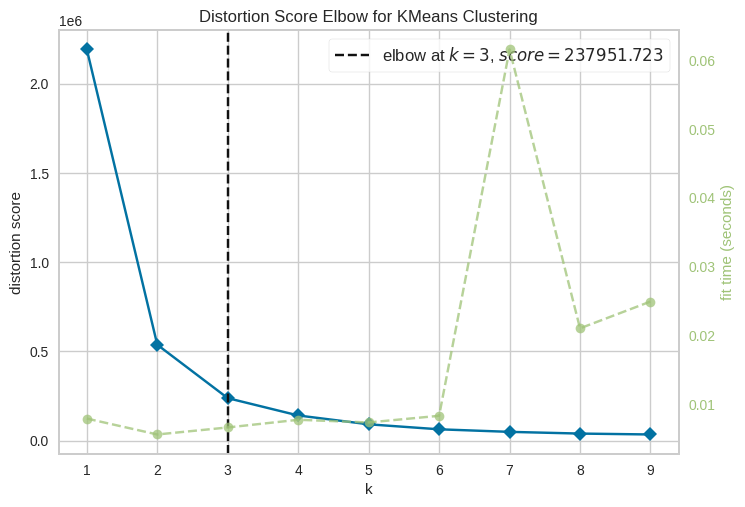

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Elbow Method
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_kmeans)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [25]:
# Silhouette Score K-Means Clustering
sil_score_kmeans = silhouette_score(X_kmeans, kmeans_labels)
print(f"Silhouette Score K-Means : {sil_score_kmeans:.4f}")

Silhouette Score K-Means : 0.5895


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### (1) **Purchase Amount (USD) - Payment Method**

In [26]:
# Feature Selection 1
# Memilih kolom fitur yang diinginkan dari df
features_fs1 = ['Purchase Amount (USD)', 'Payment Method']
X_kmeans_fs1 = df[features_fs1]

# Pisahkan fitur numerik dan kategorikal secara otomatis
numerical_features_fs1 = X_kmeans_fs1.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_fs1 = X_kmeans_fs1.select_dtypes(include=['object', 'category']).columns.tolist()

# Cetak fitur numerik dan kategorikal yang ditemukan
print("Fitur Numerik (fs1):", numerical_features_fs1)
print("Fitur Kategorikal (fs1):", categorical_features_fs1)

# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoder_fs1 = LabelEncoder()

# Terapkan Label Encoding untuk setiap kolom kategorikal
X_kmeans_fs1 = X_kmeans_fs1.copy()
for feature in categorical_features_fs1:
    X_kmeans_fs1.loc[:, feature] = label_encoder_fs1.fit_transform(X_kmeans_fs1[feature])

# X berisi data numerik
X_kmeans_fs1 = X_kmeans_fs1.values  # Konversi ke NumPy array

# Melatih model KMeans dengan jumlah cluster = 3
k_fs1 = 3
kmeans_fs1 = KMeans(n_clusters=k_fs1, random_state=0)
kmeans_fs1.fit(X_kmeans_fs1)

# Mendapatkan label cluster
kmeans_labels_fs1 = kmeans_fs1.labels_

print("--------------------------------------------------")
# Fungsi untuk menganalisis karakteristik setiap K-Means Clustering
def analyze_clusters_fs1(X, labels, k, df):
    print("Analisis Karakteristik Setiap Cluster (fs1):")

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Jumlah Anggota: {len(cluster_data)}")

        # Menghitung rata-rata untuk fitur numerik
        for i, feature in enumerate(numerical_features_fs1):
            mean_value = cluster_data[:, i].mean()
            print(f"Rata-rata {feature}: {mean_value:.2f}")

        # Menghitung modus untuk fitur kategorikal
        for i, feature in enumerate(categorical_features_fs1):
            category_data = df[feature].iloc[labels == cluster_id]
            values, counts = np.unique(category_data, return_counts=True)
            mode_value = values[np.argmax(counts)]
            print(f"Modus {feature}: {mode_value}")

# Analisis karakteristik setiap cluster (fs1)
analyze_clusters_fs1(X_kmeans_fs1, kmeans_labels_fs1, k_fs1, df)

# Salin DataFrame untuk cluster fs1
df_cluster_fs1 = copy.deepcopy(df)
df_cluster_fs1['Cluster_fs1'] = kmeans_labels_fs1

# Tampilkan df_cluster_fs1 untuk melihat hasilnya
print("--------------------------------------------------")
df_cluster_fs1.head()

Fitur Numerik (fs1): ['Purchase Amount (USD)']
Fitur Kategorikal (fs1): ['Payment Method']
--------------------------------------------------
Analisis Karakteristik Setiap Cluster (fs1):

Cluster 1:
Jumlah Anggota: 1254
Rata-rata Purchase Amount (USD): 87.69
Modus Payment Method: Credit Card

Cluster 2:
Jumlah Anggota: 1381
Rata-rata Purchase Amount (USD): 33.21
Modus Payment Method: PayPal

Cluster 3:
Jumlah Anggota: 1265
Rata-rata Purchase Amount (USD): 61.07
Modus Payment Method: Cash
--------------------------------------------------


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster_fs1
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,2


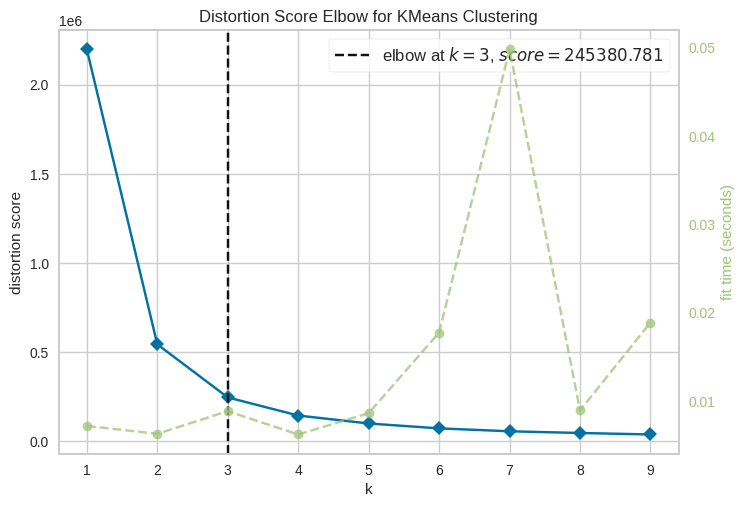

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Elbow Method untuk Feature Selection 1
kmeans_fs1 = KMeans()

# Visualizer untuk menentukan jumlah cluster optimal (range dari 1 sampai 10)
visualizer_fs1 = KElbowVisualizer(kmeans_fs1, k=(1, 10))

# Fit visualizer dengan data hasil feature selection 1
visualizer_fs1.fit(X_kmeans_fs1)

# Tampilkan grafik Elbow
visualizer_fs1.show()

In [28]:
# Silhouette Score untuk K-Means dengan Feature Selection 1
sil_score_kmeans_fs1 = silhouette_score(X_kmeans_fs1, kmeans_labels_fs1)
print(f"Silhouette Score K-Means (fs1): {sil_score_kmeans_fs1:.4f}")

Silhouette Score K-Means (fs1): 0.5810


### (2) **Purchase Amount (USD) - Frequency of Purchases**

In [29]:
# Feature Selection 2
# Memilih kolom fitur yang diinginkan dari df
features_fs2 = ['Purchase Amount (USD)', 'Frequency of Purchases']
X_kmeans_fs2 = df[features_fs2]

# Pisahkan fitur numerik dan kategorikal secara otomatis
numerical_features_fs2 = X_kmeans_fs2.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_fs2 = X_kmeans_fs2.select_dtypes(include=['object', 'category']).columns.tolist()

# Cetak fitur numerik dan kategorikal yang ditemukan
print("Fitur Numerik (fs2):", numerical_features_fs2)
print("Fitur Kategorikal (fs2):", categorical_features_fs2)

# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoder_fs2 = LabelEncoder()

# Terapkan Label Encoding untuk setiap kolom kategorikal
X_kmeans_fs2 = X_kmeans_fs2.copy()
for feature in categorical_features_fs2:
    X_kmeans_fs2.loc[:, feature] = label_encoder_fs2.fit_transform(X_kmeans_fs2[feature])

# X berisi data numerik
X_kmeans_fs2 = X_kmeans_fs2.values  # Konversi ke NumPy array

# Melatih model KMeans dengan jumlah cluster = 3
k_fs2 = 3
kmeans_fs2 = KMeans(n_clusters=k_fs2, random_state=0)
kmeans_fs2.fit(X_kmeans_fs2)

# Mendapatkan label cluster
kmeans_labels_fs2 = kmeans_fs2.labels_

print("--------------------------------------------------")
# Fungsi untuk menganalisis karakteristik setiap K-Means Clustering
def analyze_clusters_fs2(X, labels, k, df):
    print("Analisis Karakteristik Setiap Cluster (fs2):")

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Jumlah Anggota: {len(cluster_data)}")

        # Menghitung rata-rata untuk fitur numerik
        for i, feature in enumerate(numerical_features_fs2):
            mean_value = cluster_data[:, i].mean()
            print(f"Rata-rata {feature}: {mean_value:.2f}")

        # Menghitung modus untuk fitur kategorikal
        for i, feature in enumerate(categorical_features_fs2):
            category_data = df[feature].iloc[labels == cluster_id]
            values, counts = np.unique(category_data, return_counts=True)
            mode_value = values[np.argmax(counts)]
            print(f"Modus {feature}: {mode_value}")

# Analisis karakteristik setiap cluster (fs1)
analyze_clusters_fs2(X_kmeans_fs2, kmeans_labels_fs2, k_fs2, df)

# Salin DataFrame untuk cluster fs1
df_cluster_fs2 = copy.deepcopy(df)
df_cluster_fs2['Cluster_fs2'] = kmeans_labels_fs2

# Tampilkan df_cluster_fs1 untuk melihat hasilnya
print("--------------------------------------------------")
df_cluster_fs2.head()

Fitur Numerik (fs2): ['Purchase Amount (USD)']
Fitur Kategorikal (fs2): ['Frequency of Purchases']
--------------------------------------------------
Analisis Karakteristik Setiap Cluster (fs2):

Cluster 1:
Jumlah Anggota: 1254
Rata-rata Purchase Amount (USD): 87.69
Modus Frequency of Purchases: Every 3 Months

Cluster 2:
Jumlah Anggota: 1381
Rata-rata Purchase Amount (USD): 33.21
Modus Frequency of Purchases: Every 3 Months

Cluster 3:
Jumlah Anggota: 1265
Rata-rata Purchase Amount (USD): 61.07
Modus Frequency of Purchases: Fortnightly
--------------------------------------------------


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster_fs2
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,2


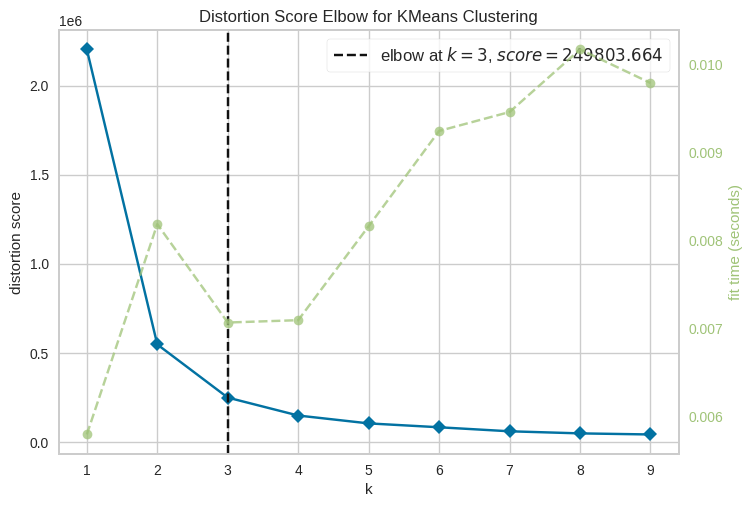

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Elbow Method untuk Feature Selection 1
kmeans_fs2 = KMeans()

# Visualizer untuk menentukan jumlah cluster optimal (range dari 1 sampai 10)
visualizer_fs2 = KElbowVisualizer(kmeans_fs2, k=(1, 10))

# Fit visualizer dengan data hasil feature selection 1
visualizer_fs2.fit(X_kmeans_fs2)

# Tampilkan grafik Elbow
visualizer_fs2.show()

In [31]:
# Silhouette Score untuk K-Means dengan Feature Selection 1
sil_score_kmeans_fs2 = silhouette_score(X_kmeans_fs2, kmeans_labels_fs2)
print(f"Silhouette Score K-Means (fs2): {sil_score_kmeans_fs2:.4f}")

Silhouette Score K-Means (fs2): 0.5759


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

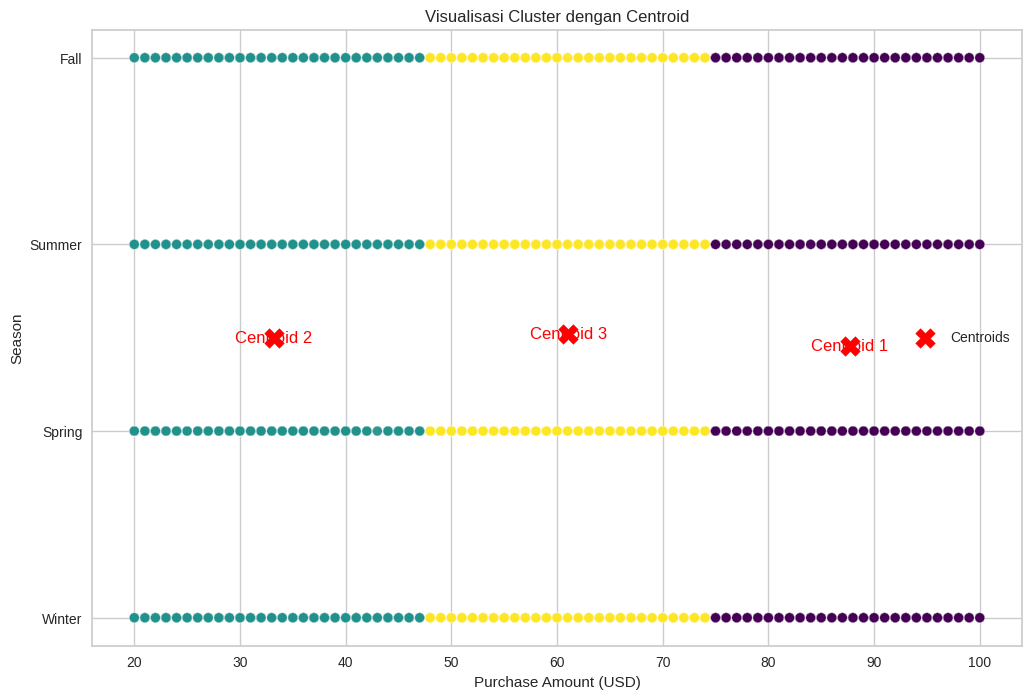

Nilai Centroids:
Centroid 1: Purchase Amount (USD) = 87.69, Season = Fall
Centroid 2: Purchase Amount (USD) = 33.21, Season = Spring
Centroid 3: Purchase Amount (USD) = 61.07, Season = Winter


In [32]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_kmeans)

centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data (menggunakan df_cluster untuk 'Purchase Amount (USD)' dan 'Season')
plt.scatter(df_cluster['Purchase Amount (USD)'], df_cluster['Season'], c=df_cluster['Cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    cluster_data = df_cluster[df_cluster['Cluster'] == i]
    mode_season = cluster_data['Season'].mode()
    season_mode = mode_season[0] if not mode_season.empty else 'Unknown'
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Season')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    cluster_data = df_cluster[df_cluster['Cluster'] == i]
    mode_season = cluster_data['Season'].mode()
    season_mode = mode_season[0] if not mode_season.empty else 'Unknown'
    print(f"Centroid {i+1}: Purchase Amount (USD) = {centroid[0]:.2f}, Season = {season_mode}")

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [33]:
#Type your code here

Fitur Numerik: Purchase Amount (USD) | Fitur Kategorikal: Season

---

Analisis Karakteristik Setiap Cluster:
1. Cluster 1: Fall High Customers
  *   Jumlah Anggota: 1254
  *   Rata-rata Purchase Amount (USD): 87.69
  *   Modus Season: Fall
  *   Analisis : Pada cluster ini, pelanggan melakukan rata-rata Jumlah Pembelian yang tergolong tinggi ketika musim gugur (Fall).

2. Cluster 2: Spring Low Customers
  *   Jumlah Anggota: 1381
  *   Rata-rata Purchase Amount (USD): 33.21
  *   Modus Season: Spring
  *   Analisis : Pada cluster ini, pelanggan melakukan rata-rata Jumlah Pembelian yang tergolong rendah ketika musim semi (Spring).

3. Cluster 3: Winter Medium Customers
  *   Jumlah Anggota: 1265
  *   Rata-rata Purchase Amount (USD): 61.07
  *   Modus Season: Winter
  *   Analisis : Pada cluster ini, pelanggan melakukan rata-rata Jumlah Pembelian yang tergolong sedang ketika musim dingin (Winter).
  
---

Perbandingan dengan Feature Selection
1. Purchase Amount (USD) - Season
  *   Jumlah Cluster: 3
  *   Silhoutte Score: 0.5895

2. Purchase Amount (USD) - Payment Method
  *   Jumlah Cluster: 3
  *   Silhoutte Score: 0.5810

3. Purchase Amount (USD) - Frequency of Purchases
  *   Jumlah Cluster: 3
  *   Silhoutte Score: 0.5759

Kesimpulan: Dengan Feature Selection yang digunakan, dapat dilihat bahwa Clustering menggunakan fitur Purchase Amount (USD) dan Season memberikan cluster terbaik yang menunjukkan bahwa musim memiliki pengaruh yang lebih signifikan terhadap jumlah pembelian dibandingkan metode pembayaran atau frekuensi pembelian.

---

Saran:
1. Melakukan clustering menggunakan lebih dari 2 fitur.
2. Menggunakan kombinasi fitur-fitur yang lain untuk mendapatkan hasil clustering yang mungkin lebih optimal.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
# Menyimpan data terpilih ke file CSV baru
df_cluster.to_csv("shopping_trends_updated_with_cluster.csv", index=False)